#  Finding the Best Markets to Advertise In
* Introduction: Promote our product and invest some money in advertisement for e-learning company that offers courses on programming.
* Goal: Find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import std,var

In [2]:
survey_2017=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey_2017.head()

C:\Users\bayonetta\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
survey_2017['AttendedBootcamp'].value_counts()

0.0    16611
1.0     1098
Name: AttendedBootcamp, dtype: int64

In [5]:
survey_2017['CityPopulation'].value_counts()

more than 1 million              6534
between 100,000 and 1 million    5276
less than 100,000                3544
Name: CityPopulation, dtype: int64

In [6]:
survey_2017['BootcampName'].value_counts()

General Assembly    58
App Academy         51
IronHack            49
The Iron Yard       40
Lighthouse Labs     38
                    ..
Product School       1
Geekwise Academy     1
Geekskool            1
Jaaga                1
Fire Bootcamp        1
Name: BootcampName, Length: 141, dtype: int64

In [7]:
survey_2017['CodeEventDjangoGirls'].value_counts()

1.0    165
Name: CodeEventDjangoGirls, dtype: int64

## Understanding the Data
* To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.
* One good candidate for our purpose is freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.
* most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach.

We'd like to know:
* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [8]:
# Frequency distribution table for 'JobRoleInterest'
survey_2017['JobRoleInterest'].value_counts()

Full-Stack Web Developer                                                                                                                                                                                                                                                                    823
  Front-End Web Developer                                                                                                                                                                                                                                                                   450
  Data Scientist                                                                                                                                                                                                                                                                            152
Back-End Web Developer                                                                                                                  

In [9]:
survey_2017['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

* Split each string in the JobRoleInterest column to find the number of options for each participant.
** We'll first drop the null values because we can't split Nan values.
* Generate a frequency table for the variable describing the number of options.

In [10]:
roleinterest_nonull=survey_2017['JobRoleInterest'].dropna()
splitted_roleinterest=roleinterest_nonull.str.split(',')

In [11]:
num_interest=splitted_roleinterest.apply(lambda x: len(x))
num_interest.value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [12]:
# Frequency table
web_or_mobile=roleinterest_nonull.str.contains('Web Developer|Mobile Developer')
freq_web_mobile=web_or_mobile.value_counts(normalize=True)*100
print(freq_web_mobile)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


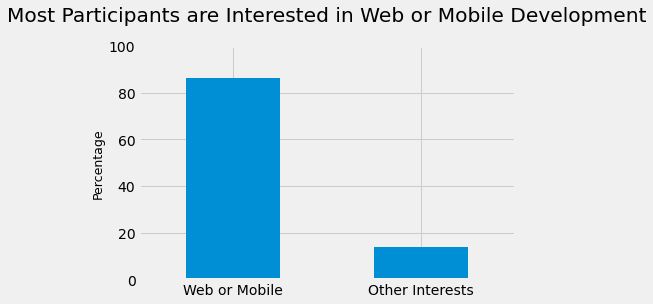

In [13]:
%matplotlib inline
plt.style.use('fivethirtyeight')
freq_web_mobile.plot.bar()
plt.title('Most Participants are Interested in Web or Mobile Development', y=1.08)# pads the title upward a little bit
plt.ylabel('Percentage', fontsize=12.5)
plt.xticks([0,1],['Web or Mobile','Other Interests'], rotation=0)
plt.ylim([0,100])
plt.show()

Approximately 87% people in the sample are interest in either web development or mobile development. We can safely use this sample for our goal based on the representative of these figures.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.


## New Coders - Locations and Densities
Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [14]:
# Isolate the participants who answered the job role interest survey
survey_2017_interest=survey_2017[survey_2017['JobRoleInterest'].notnull()].copy()
# Frequency tables with absolute frequencies and reletive frequancies
absolute_freq=survey_2017_interest['CountryLive'].value_counts()
relative_freq=survey_2017_interest['CountryLive'].value_counts(normalize=True).mul(100)
# Display the frequencies in the same dataframe
pd.DataFrame(data={'Absolute_freq':absolute_freq,
            'Relative_freq': relative_freq})

,Absolute_freq,Relative_freq
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.


## Money Willing to spend for New Coders
Now we are figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [15]:
survey_2017_interest['MoneyForLearning'].value_counts()

0.0        3194
100.0       434
200.0       315
500.0       232
50.0        227
           ... 
14023.0       1
950.0         1
28.0          1
389.0         1
297.0         1
Name: MoneyForLearning, Length: 204, dtype: int64

In [16]:
survey_2017_interest['MonthsProgramming'].value_counts()

1.0      767
2.0      669
6.0      654
3.0      637
12.0     616
        ... 
43.0       1
46.0       1
105.0      1
51.0       1
89.0       1
Name: MonthsProgramming, Length: 91, dtype: int64

In [17]:
# Replace 0 with 1 to avoid division by 0
survey_2017_interest['MonthsProgramming'].replace(0,1,inplace=True)

In [18]:
# New column for the amount of money each student spends on the programming each month
survey_2017_interest['MoneyPerMonth']=survey_2017_interest['MoneyForLearning'] / survey_2017_interest['MonthsProgramming']
survey_2017_interest['MoneyPerMonth'].isnull().sum()

675

In [19]:
# Only keep the rows with non-nulls in the MoneyPerMonth column
survey_2017_interest=survey_2017_interest[survey_2017_interest['MoneyPerMonth'].notnull()].copy()

In [20]:
# Remove the rows with null values in CountryLive column
survey_2017_interest=survey_2017_interest[survey_2017_interest['CountryLive'].notnull()].copy()
survey_2017_interest['CountryLive'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
                            ... 
Gibraltar                      1
Lebanon                        1
Papua New Guinea               1
Somalia                        1
Gambia                         1
Name: CountryLive, Length: 131, dtype: int64

This data should be enough, now we can compute the average value spent per month in each country by each student. Use mean to compute the average

In [21]:
country_mean=survey_2017_interest.groupby('CountryLive').mean()

In [22]:
survey_2017_interest["CountryLive"].unique()

array(['United States of America', 'Brazil', 'Portugal', 'United Kingdom',
       'Mexico', 'Germany', 'Argentina', 'Venezuela', 'India', 'Canada',
       'Australia', 'Egypt', 'Lithuania', 'Finland',
       'Bosnia & Herzegovina', 'Netherlands (Holland, Europe)', 'Kenya',
       'Switzerland', 'Italy', 'Great Britain', 'Russia', 'China',
       'Spain', 'Ireland', 'Poland', 'France', 'Kyrgyzstan', 'Greece',
       'Philippines', 'Georgia', 'Turkey', 'Romania', 'Norway', 'Nigeria',
       'Peru', 'Iraq', 'Sweden', 'Bulgaria', 'Singapore', 'Ukraine',
       'Hungary', 'Austria', 'New Zealand', 'Serbia', 'Bangladesh',
       'Honduras', 'Belgium', 'Puerto Rico', 'Denmark', 'Japan', 'Cyprus',
       'Ghana', 'Czech Republic', 'Macedonia', 'Costa Rica', 'Tunisia',
       'South Africa', 'Albania', 'Malaysia', 'Thailand', 'Iceland',
       'Pakistan', 'Guam', 'Indonesia', 'Algeria', 'Senegal', 'Belarus',
       'Sri Lanka', 'Israel', 'United Arab Emirates',
       'Virgin Islands (USA)', 'T

In [23]:
country_mean['MoneyPerMonth'][['United States of America','India','United Kingdom','Canada']]


CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct. Due to the cultural and economic circumstances, coding is one of the most efficient way to uplift one's financial situtation, this might be the reanson Indian people are willing to spend a lot money on coding programs.

## Dealing with Extreme outliers
Visualize the distribution of MoneyPerMonth for the four countries

In [24]:
# Isolate the four countries we get above
four_countries=survey_2017_interest[survey_2017_interest['CountryLive'].str.contains('United States of America|India|United Kindom|Canada')]

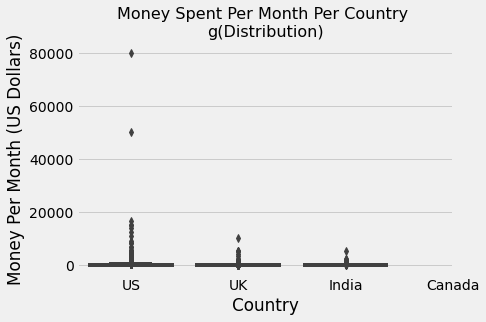

In [25]:
import seaborn as sns
sns.boxplot(y='MoneyPerMonth',x='CountryLive',data=four_countries)
plt.title('Money Spent Per Month Per Country \ng(Distribution)',fontsize=16)
plt.xlabel('Country')
plt.ylabel('Money Per Month (US Dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month 50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over $20,000 per month.

In [26]:
survey_2017_interest=survey_2017_interest[survey_2017_interest['MoneyPerMonth']<20000]


In [27]:
country_mean=survey_2017_interest.groupby('CountryLive').mean()

In [44]:
country_mean['MoneyPerMonth'][['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

In [45]:
# Isolate the four countries we got above
four_countries=survey_2017_interest[survey_2017_interest['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]


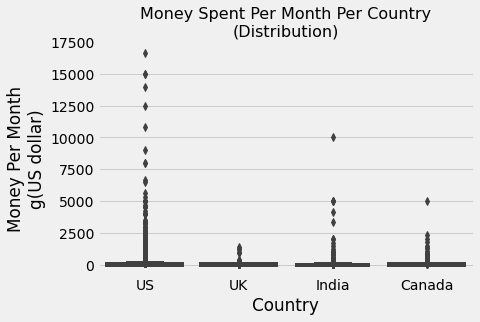

In [46]:
# Box Plot to visualize distributions
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=four_countries)
plt.title('Money Spent Per Month Per Country\n(Distribution)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Money Per Month\ng(US dollar)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.



In [47]:
# Inspect the outliers for India
india_outliers=four_countries[(four_countries['CountryLive']=='India') &
                              (four_countries['MoneyPerMonth']>2500)
    
]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.



In [48]:
# Now we can sefely remove the outliers for India
four_countries=four_countries.drop(india_outliers.index) 

Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.



In [49]:
us_outliers=four_countries[(four_countries['CountryLive']=='United States of America')
                          &
                          (four_countries['MoneyPerMonth']>6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

* Didn't attend bootcamps.
* Had been programming for three months or less when at the time they completed the survey.

In [50]:
# Remove the participants who didn't attend a bootcamp at all
no_bootcamp_us=four_countries[(four_countries['CountryLive']=='United States of America')
                               &
                               (four_countries['MoneyPerMonth']>=6000)
                               &
                               (four_countries['AttendedBootcamp']==0)]
four_countries=four_countries.drop(no_bootcamp_us.index)

# Remove the participants who had been programming less than 3 months at the time
less_than_3mon=four_countries[(four_countries['CountryLive']=='United States of America')
                             &
                             (four_countries['MoneyPerMonth']>=6000)
                             &
                              (four_countries['MonthsProgramming']<=3)]
four_countries=four_countries.drop(less_than_3mon.index)
                               

In [51]:
canada_outliers=four_countries[(four_countries['CountryLive']=='Canada')
                              &
                              (four_countries['MoneyPerMonth']>4500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


The situation is similar to the US dataset, let's take the same approach

In [52]:
# Remove the outliers for Canada
four_countries=four_countries.drop(canada_outliers.index)

In [53]:
four_countries.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

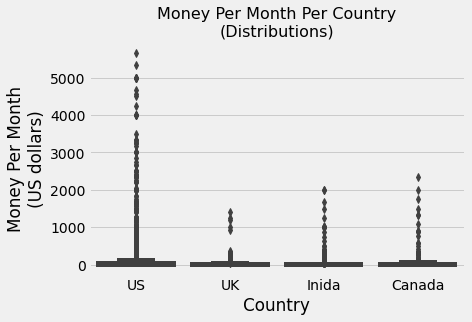

In [54]:
sns.boxplot(x='CountryLive',y='MoneyPerMonth',data=four_countries)
plt.title('Money Per Month Per Country\n(Distributions)',fontsize=16)
plt.xlabel('Country')
plt.ylabel('Money Per Month\n(US dollars)')
plt.xticks(range(4), ['US','UK','Inida','Canada'])
plt.show()

## Choosing the Two Best Markets
Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly 143).

We sell subscriptions at a price of 59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly 93 per month, compared to India (66) and the United Kingdom (45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

* 59 doesn't seem like an expensive sum for people in India since they spend on average 66 each month.
* We have almost twice as more potential customers in India than we have in Canada:

In [55]:
four_countries['CountryLive'].value_counts(normalize=True).mul(100)

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

  * 60% for the US, 25% for India, 15% for Canada.
  * 50% for the US, 30% for India, 20% for Canada; etc.
2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

  * 70% for the US, and 30% for India.
  * 65% for the US, and 35% for Canada; etc.
3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.